In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing the clean data

data_df = pd.read_csv("./Data_set/clean_spotify_youtube.csv")
data_df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [14]:
#splitting the data into three groups: Spotify data, Youtube data and Data for both
spotify_df = data_df.dropna(subset=["Stream","Danceability"])

spotify_sample = spotify_df.sample(n = 1000)

youtube_df = data_df.dropna(subset=["Views","Danceability"])

youtube_sample = youtube_df.sample(n= 1000)

combo_df = data_df.dropna(subset=["Stream","Views","Danceability"])

combo_sample = combo_df.sample(n=1000)

In [15]:
#defines a funtion that will end up outputting a plot for youtube data
def youtube_plotting(x):
    plt.scatter(youtube_sample[x],youtube_sample["Views"],color="blue",edgecolors="black")
    plt.xlabel(x)
    plt.ylabel("Views (Scientific Notation)")
    plt.title(f"{x} vs. Views")
    plt.tight_layout()
    plt.savefig(f"./Data_set/numerical_fig{x}vsViews.png")
    plt.show()
    

In [16]:
#defines a funtion that will end up outputting a plot for youtube data
def spotify_plotting(x):
    plt.scatter(spotify_sample[x],spotify_sample["Stream"],color="r",edgecolors="black")
    plt.xlabel(x)
    plt.ylabel("Streams (Scientific Notation)")
    plt.title(f"{x} vs. Streams")
    plt.tight_layout()
    plt.savefig(f"./Data_set/numerical_fig{x}vsStream.png")
    plt.show()
    

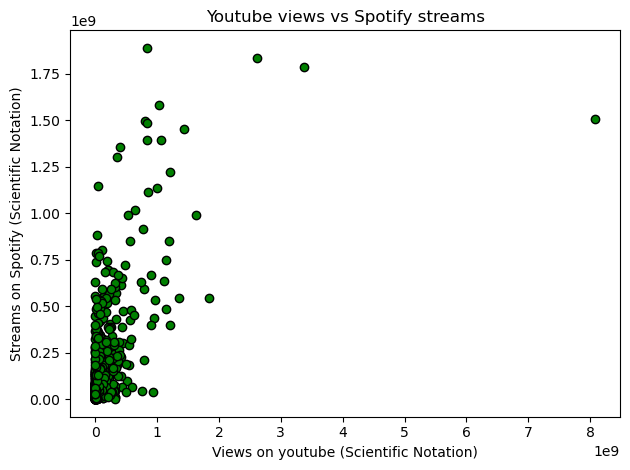

In [17]:
plt.scatter(combo_sample["Views"],combo_sample["Stream"],color = "g", edgecolors="black")
plt.xlabel("Views on youtube (Scientific Notation)")
plt.ylabel("Streams on Spotify (Scientific Notation)")
plt.title("Youtube views vs Spotify streams")
plt.tight_layout()
plt.show()

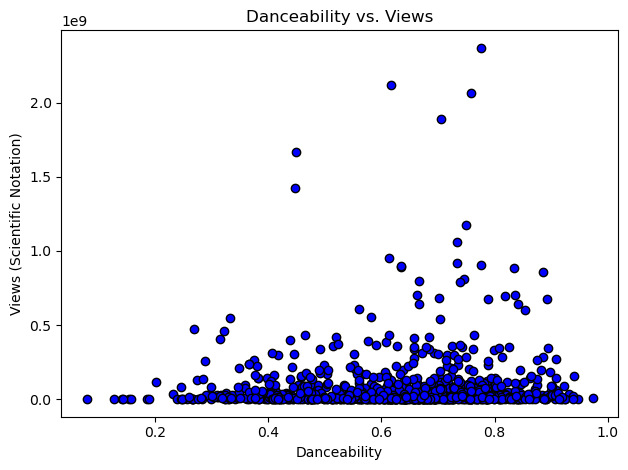

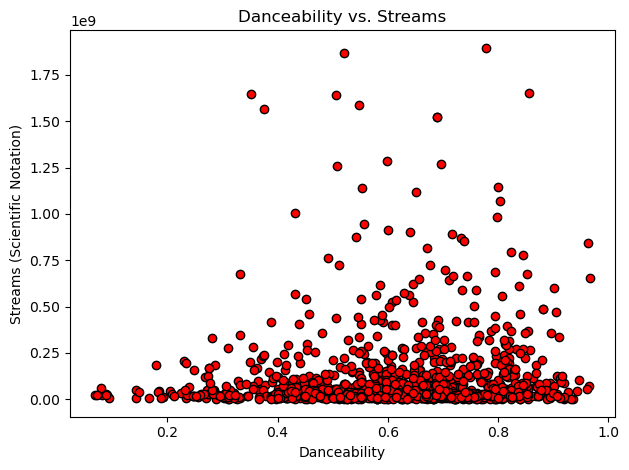

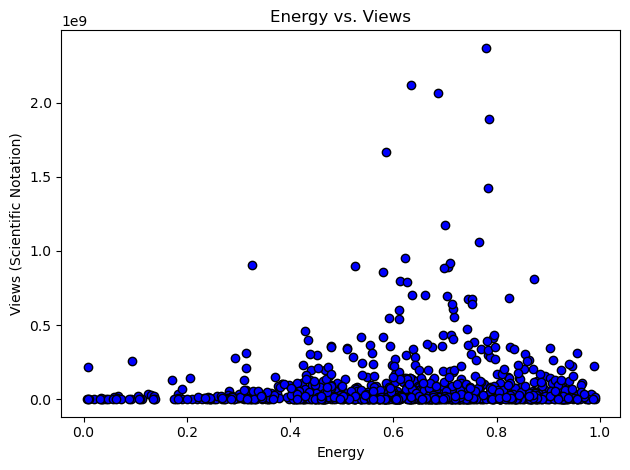

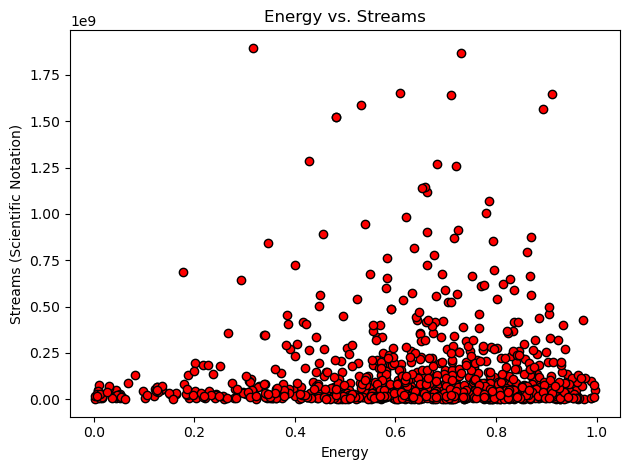

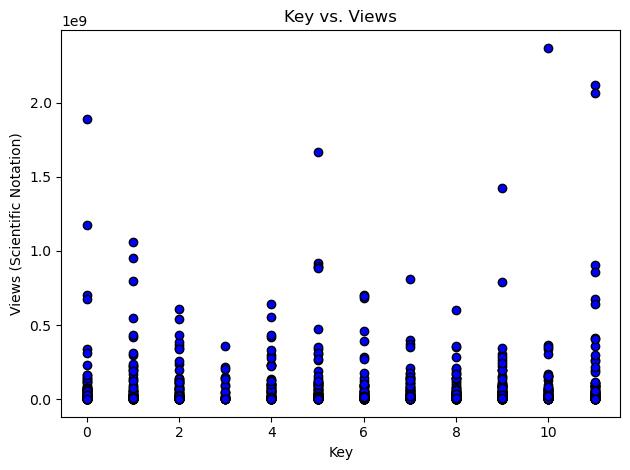

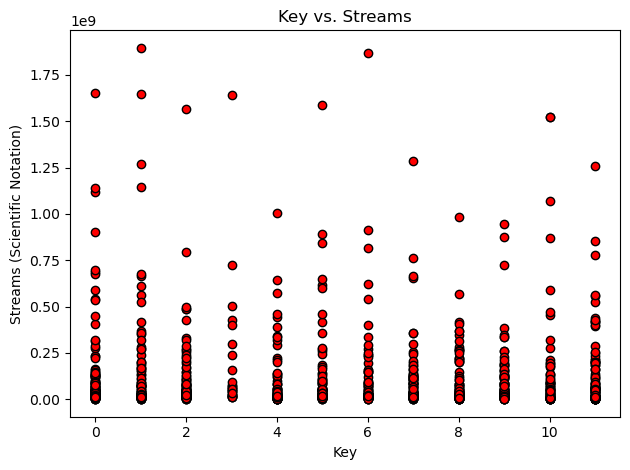

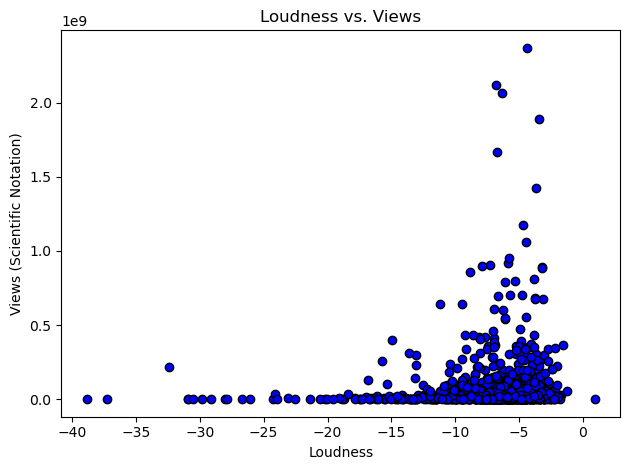

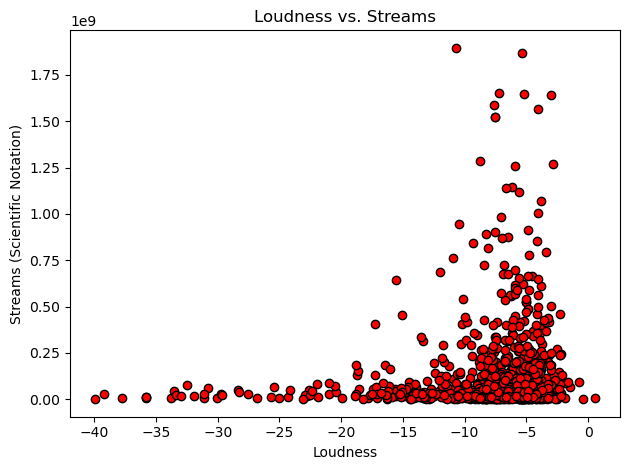

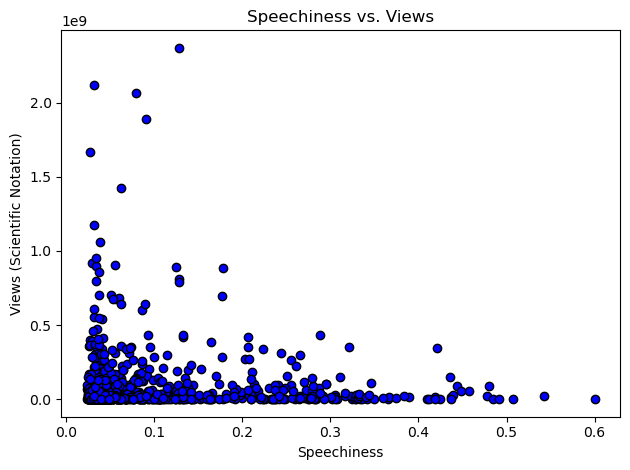

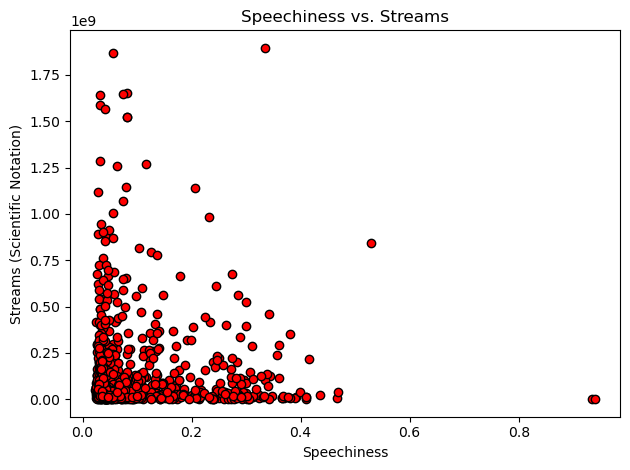

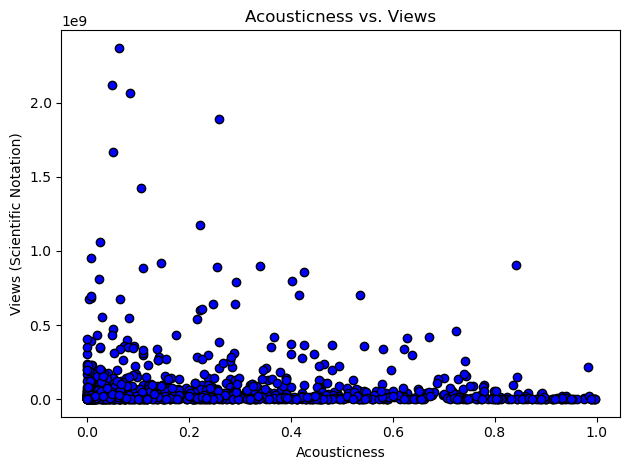

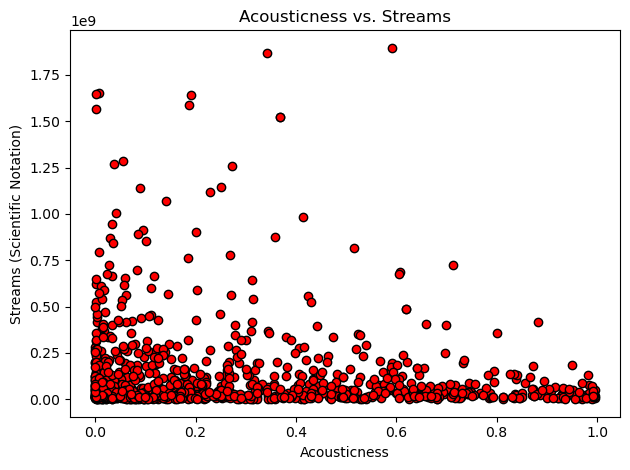

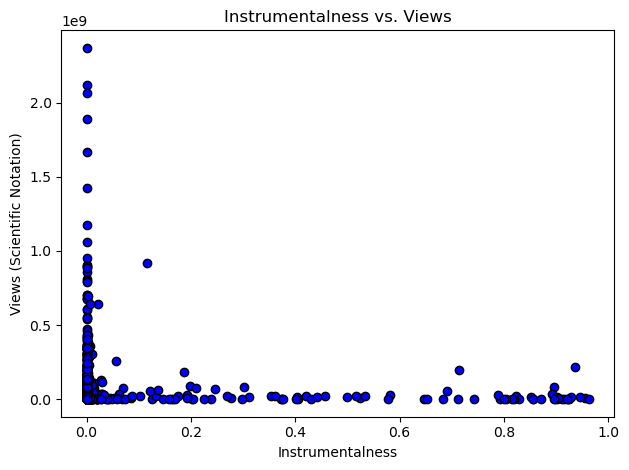

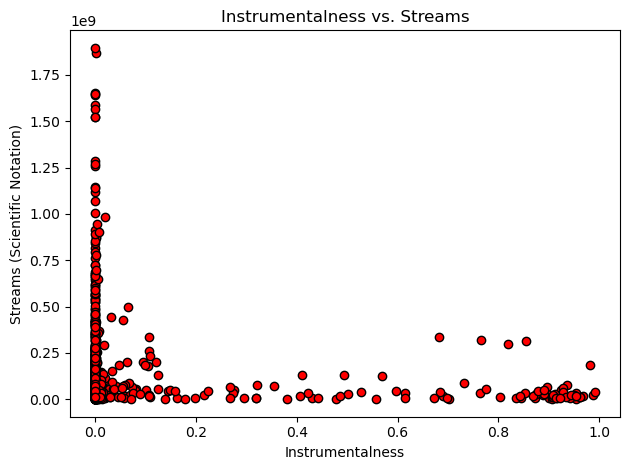

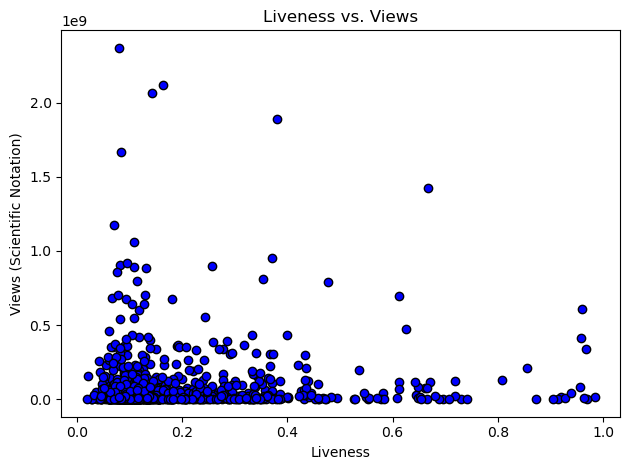

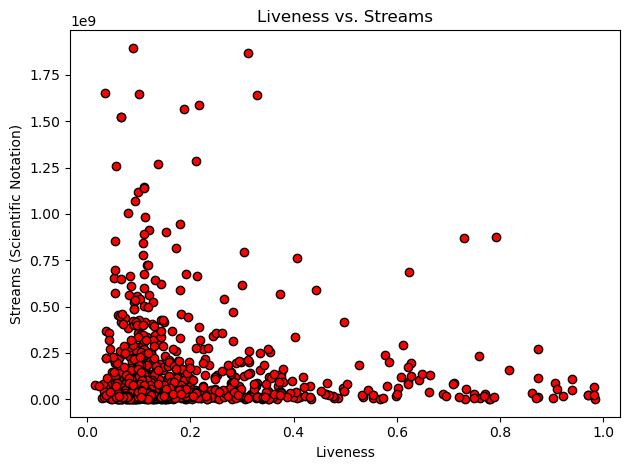

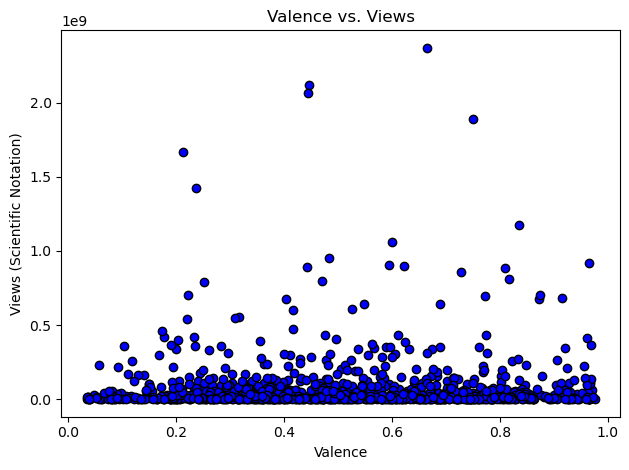

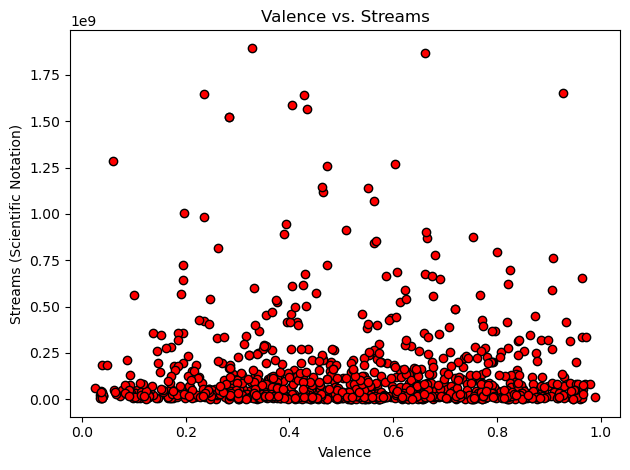

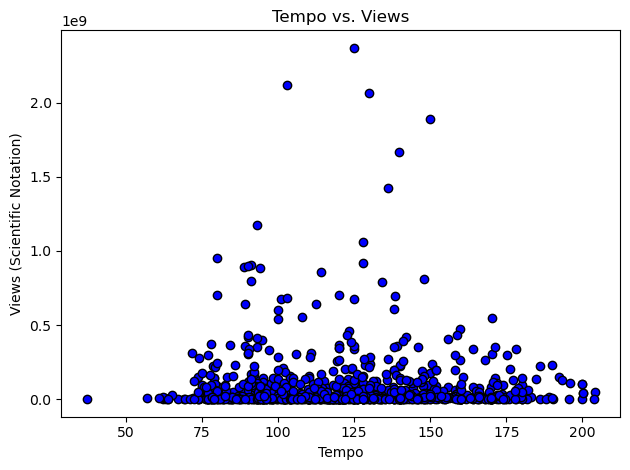

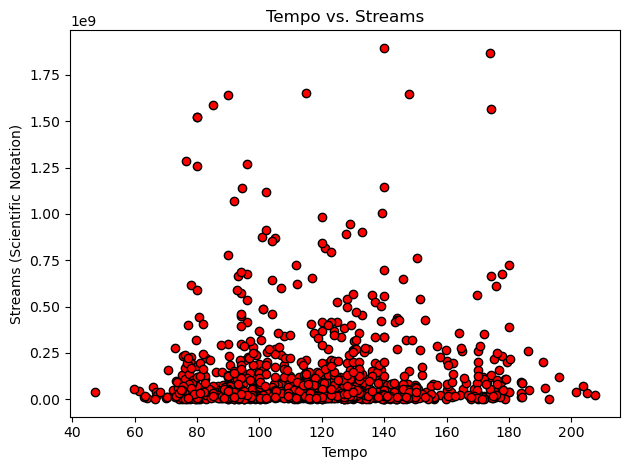

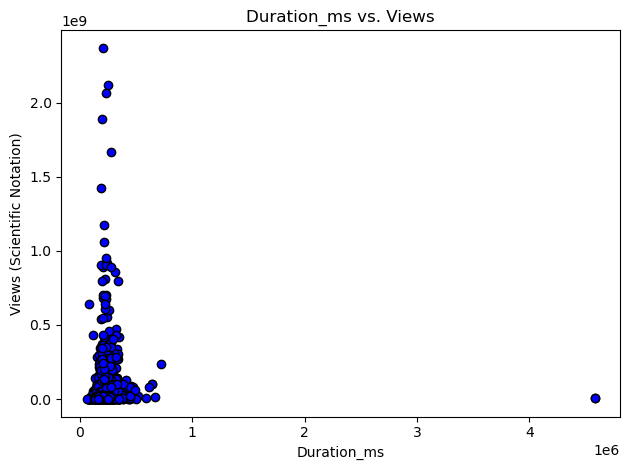

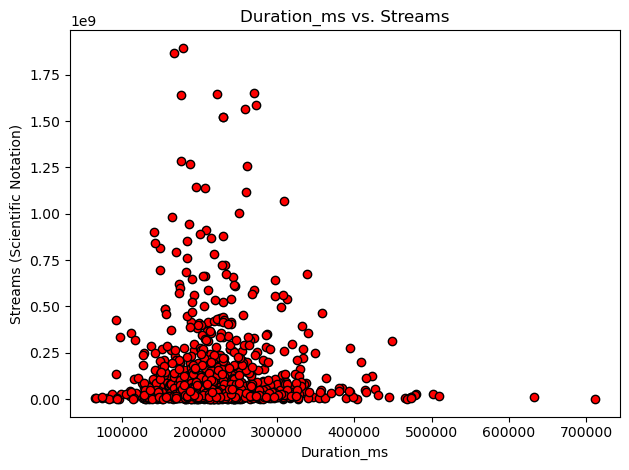

In [18]:
variables = ['Danceability','Energy','Key','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Duration_ms']

for a in variables:
    youtube_plotting(a)
    spotify_plotting(a)

In [19]:
ed_df = data_df[data_df["Artist"] == "Ed Sheeran"]
ed_df.sort_index(1,"Views",ascending=False)

C:\Users\15037\AppData\Local\Temp\ipykernel_26072\804224975.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  ed_df.sort_index(1,"Views",ascending=False)


,official_video,Views,Valence,Track,Title,Tempo,Stream,Speechiness,Loudness,Liveness,...,Instrumentalness,Energy,Duration_ms,Danceability,Comments,Channel,Artist,Album_type,Album,Acousticness
12449,True,3.361086e+09,0.168,Perfect,Ed Sheeran - Perfect (Official Music Video),95.050,2.312690e+09,0.0232,-6.312,0.1060,...,0.000000,0.448,263400.0,0.599,486143.0,Ed Sheeran,Ed Sheeran,album,÷ (Deluxe),0.1630
12450,True,4.761636e+08,0.537,Bad Habits,Ed Sheeran - Bad Habits [Official Video],126.011,1.401518e+09,0.0347,-3.745,0.3660,...,0.000028,0.893,230747.0,0.807,149738.0,Ed Sheeran,Ed Sheeran,album,=,0.0451
12451,True,2.592677e+08,0.822,Shivers,Ed Sheeran - Shivers [Official Video],141.020,1.104262e+09,0.0856,-2.724,0.0424,...,0.000000,0.859,207853.0,0.788,54783.0,Ed Sheeran,Ed Sheeran,album,=,0.2810
12452,True,5.908398e+09,0.931,Shape of You,Ed Sheeran - Shape of You (Official Music Video),95.977,3.362005e+09,0.0802,-3.183,0.0931,...,0.000000,0.652,233713.0,0.825,1130327.0,Ed Sheeran,Ed Sheeran,album,÷ (Deluxe),0.5810
12453,True,1.265618e+09,0.201,Photograph,Ed Sheeran - Photograph (Official Music Video),107.989,2.067689e+09,0.0476,-10.480,0.0986,...,0.000464,0.379,258987.0,0.614,170389.0,Ed Sheeran,Ed Sheeran,album,x (Wembley Edition),0.6070
12454,True,2.428327e+07,0.501,Celestial,"Ed Sheeran, Pokémon - Celestial [Official Video]",123.038,9.249898e+07,0.0397,-1.248,0.1610,...,0.000000,0.852,209027.0,0.574,19898.0,Ed Sheeran,Ed Sheeran,single,Celestial,0.0529
12455,True,3.547156e+09,0.591,Thinking out Loud,Ed Sheeran - Thinking Out Loud (Official Music...,78.998,2.154334e+09,0.0295,-6.061,0.1840,...,0.000000,0.445,281560.0,0.781,362545.0,Ed Sheeran,Ed Sheeran,album,x (Wembley Edition),0.4740
12456,True,1.409938e+08,0.956,Bam Bam (feat. Ed Sheeran),Camila Cabello ft. Ed Sheeran - Bam Bam (Offic...,94.996,6.192478e+08,0.0401,-6.377,0.3330,...,0.000000,0.697,206071.0,0.756,37567.0,CamilaCabelloVEVO,Ed Sheeran,album,Familia,0.1820
12457,True,8.008663e+07,0.717,For My Hand (feat. Ed Sheeran),Burna Boy - For My Hand feat. Ed Sheeran [Offi...,104.059,1.197304e+08,0.1650,-7.779,0.2090,...,0.000157,0.479,159124.0,0.870,16591.0,Burna Boy,Ed Sheeran,album,"Love, Damini",0.1610
12458,True,3.971542e+08,0.236,Happier,Ed Sheeran - Happier (Official Music Video),89.792,1.160906e+09,0.0288,-7.355,0.1350,...,0.000000,0.385,207520.0,0.522,92841.0,Ed Sheeran,Ed Sheeran,album,÷ (Deluxe),0.5360


NameError: name 'np' is not defined

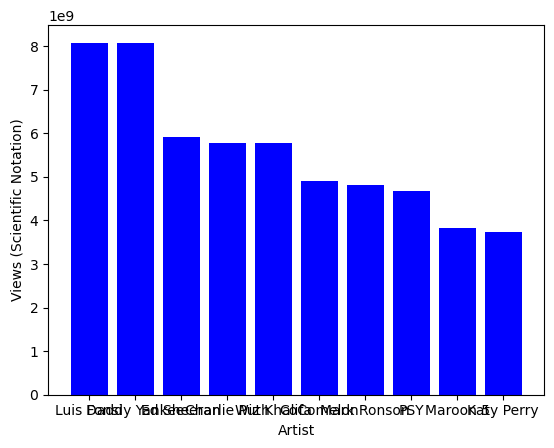

In [24]:
max_views_df = data_df.groupby("Artist").max("Views")
max_views_df = max_views_df.sort_values("Views",ascending=False).head(10).reset_index()
plt.bar(max_views_df["Artist"],max_views_df["Views"],color="blue")
plt.xlabel("Artist")
plt.ylabel("Views (Scientific Notation)")
plt.xticks(rotation=45)
plt.title("Number of Views for Artist's biggest hit")
plt.savefig("./Data_set/Single_best_song_views.png")
plt.tight_layout()
plt.show()
print(max_views_df[["Artist","Views"]])

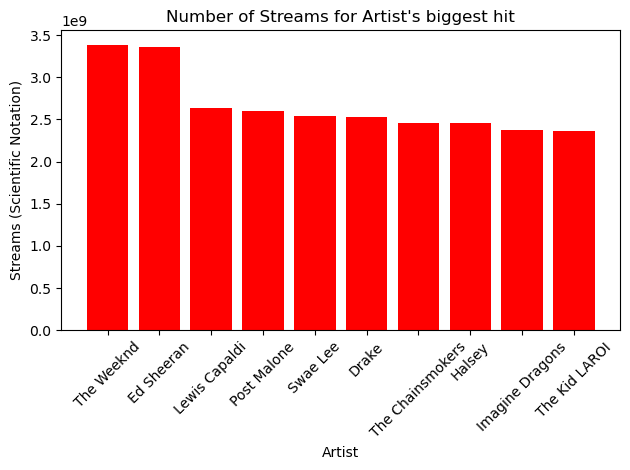

             Artist        Stream
0        The Weeknd  3.386520e+09
1        Ed Sheeran  3.362005e+09
2     Lewis Capaldi  2.634013e+09
3       Post Malone  2.594927e+09
4          Swae Lee  2.538330e+09
5             Drake  2.522432e+09
6  The Chainsmokers  2.456205e+09
7            Halsey  2.456205e+09
8   Imagine Dragons  2.369272e+09
9     The Kid LAROI  2.365778e+09


In [28]:
max_streams_df = data_df.groupby("Artist").max("Stream")
max_streams_df = max_streams_df.sort_values("Stream",ascending=False).head(10).reset_index()
plt.bar(max_streams_df["Artist"],max_streams_df["Stream"],color = "red")
plt.xlabel("Artist")
plt.ylabel("Streams (Scientific Notation)")
plt.xticks(rotation=45)
plt.title("Number of Streams for Artist's biggest hit")
plt.tight_layout()
plt.savefig("./Data_set/Single_best_song_streams.png")
plt.show()
print(max_streams_df[["Artist","Stream"]])